In [0]:
%fs ls dbfs:/FileStore/



path,name,size,modificationTime
dbfs:/FileStore/cryptoETH.csv,cryptoETH.csv,99282,1704665982000
dbfs:/FileStore/noc_regions.csv,noc_regions.csv,3595,1700131876000
dbfs:/FileStore/shared_uploads/,shared_uploads/,0,0
dbfs:/FileStore/tables/,tables/,0,0


In [0]:
pip install databricks-connect

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
%fs ls

path,name,size,modificationTime
dbfs:/FileStore/,FileStore/,0,0
dbfs:/databricks-datasets/,databricks-datasets/,0,0
dbfs:/databricks-results/,databricks-results/,0,0
dbfs:/local_disk0/,local_disk0/,0,0


In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import to_timestamp, window, avg, sum, max

inputPath = "dbfs:/FileStore/cryptoETH.csv"

# Define the schema based on your data types
jsonSchema = StructType([
    StructField("openUsd", StringType(), True),
    StructField("highUsd", StringType(), True),
    StructField("lowUsd", StringType(), True),
    StructField("closeUsd", StringType(), True),
    StructField("volume", StringType(), True),
    StructField("marketCapUsd", StringType(), True),
    StructField("date", StringType(), True)
])

# staticInputDF = (
#     spark
#         .read
#         .option("header", "true")  # Skip the first row as header
#         .schema(jsonSchema)
#         .csv(inputPath)

# Read streaming data from CSV
streamingInputDF = (
    spark
        .read
        .option("header", "true")  # Skip the first row as header
        .schema(jsonSchema)
        .csv(inputPath)
)


# Optionally, you can convert columns to appropriate types
staticInputDF = streamingInputDF.withColumn("date", to_timestamp(streamingInputDF["date"], "yyyy-MM-dd"))

display(staticInputDF)

openUsd,highUsd,lowUsd,closeUsd,volume,marketCapUsd,date
2240.77000000,2254.03000000,2238.52000000,2241.80000000,15653.38440000,15653.38440000,2024-01-07T00:00:00.000+0000
2268.78000000,2270.00000000,2216.40000000,2240.78000000,194067.86560000,194067.86560000,2024-01-06T00:00:00.000+0000
2267.11000000,2277.21000000,2206.17000000,2268.78000000,405568.00060000,405568.00060000,2024-01-05T00:00:00.000+0000
2209.72000000,2294.69000000,2201.91000000,2267.11000000,448844.05500000,448844.05500000,2024-01-04T00:00:00.000+0000
2355.35000000,2385.45000000,2100.00000000,2209.72000000,798729.48690000,798729.48690000,2024-01-03T00:00:00.000+0000
2352.05000000,2431.30000000,2341.00000000,2355.34000000,458041.66420000,458041.66420000,2024-01-02T00:00:00.000+0000
2281.87000000,2352.37000000,2265.24000000,2352.04000000,216702.69140000,216702.69140000,2024-01-01T00:00:00.000+0000
2291.68000000,2321.34000000,2258.88000000,2281.87000000,222175.87790000,222175.87790000,2023-12-31T00:00:00.000+0000
2299.20000000,2322.84000000,2268.00000000,2291.68000000,210539.13270000,210539.13270000,2023-12-30T00:00:00.000+0000
2344.15000000,2385.41000000,2255.34000000,2299.20000000,450201.20690000,450201.20690000,2023-12-29T00:00:00.000+0000


In [0]:
from pyspark.sql.functions import window, avg, sum, max, min, date_format, to_timestamp

# Perform windowed aggregations
streamingInputDF = streamingInputDF.withColumn("openUsd", streamingInputDF["openUsd"].cast(DoubleType()))
streamingInputDF = streamingInputDF.withColumn("highUsd", streamingInputDF["highUsd"].cast(DoubleType()))
streamingInputDF = streamingInputDF.withColumn("lowUsd", streamingInputDF["lowUsd"].cast(DoubleType()))
streamingInputDF = streamingInputDF.withColumn("closeUsd", streamingInputDF["closeUsd"].cast(DoubleType()))
streamingInputDF = streamingInputDF.withColumn("volume", streamingInputDF["volume"].cast(DoubleType()))
streamingInputDF = streamingInputDF.withColumn("marketCapUsd", streamingInputDF["marketCapUsd"].cast(DoubleType()))


streamingAggregationsDF = (
    streamingInputDF
        .groupBy(window("date", "1 week"))
        .agg(
            avg("openUsd").alias("avg_open"),
            max("highUsd").alias("max_high"),
            min("lowUsd").alias("min_low"),
            avg("closeUsd").alias("avg_close"),
            sum("volume").alias("total_volume"),
            sum("marketCapUsd").alias("total_market_cap")
        )
        .select(
            date_format("window.end", "yyyy-MM-dd").alias("time"),
            "avg_open", "max_high", "min_low", "avg_close",
            "total_volume", "total_market_cap"
        )
        .orderBy("total_market_cap")
)


display(streamingAggregationsDF)


time,avg_open,max_high,min_low,avg_close,total_volume,total_market_cap
2023-08-17,1845.9742857142858,1865.95,1798.17,1839.18,966206.1056000001,966206.1056000001
2024-01-11,2246.595,2294.69,2201.91,2254.6175000000003,1064133.3056,1064133.3056
2023-09-28,1593.7428571428572,1634.1,1563.01,1590.3671428571429,1144262.999,1144262.999
2023-08-10,1836.872857142857,1876.51,1802.0,1839.0785714285714,1195264.5944,1195264.5944
2023-08-03,1868.4757142857143,1886.58,1813.8,1863.89,1314880.3629999997,1314880.3629999997
2023-09-21,1630.294285714286,1669.5,1603.88,1632.382857142857,1372592.4116,1372592.4116
2023-09-07,1645.4242857142856,1729.0,1602.33,1635.1228571428571,1443755.0847999998,1443755.0847999998
2023-07-27,1876.4114285714284,1929.05,1833.19,1874.032857142857,1444710.5237,1444710.5237
2023-10-19,1562.2528571428572,1639.43,1521.0,1561.7642857142857,1481131.4801,1481131.4801
2023-08-31,1668.9157142857143,1745.84,1621.75,1672.5799999999997,1546330.3517,1546330.3517


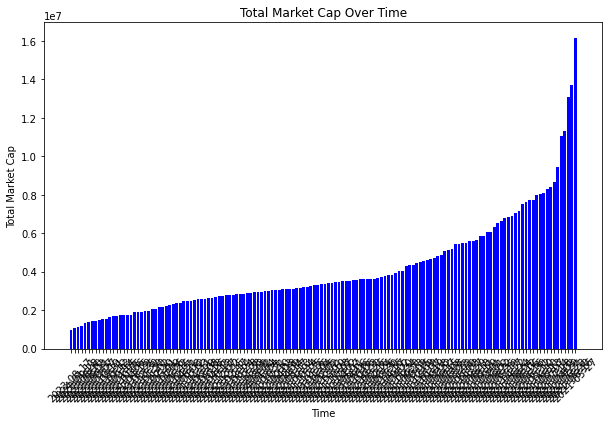

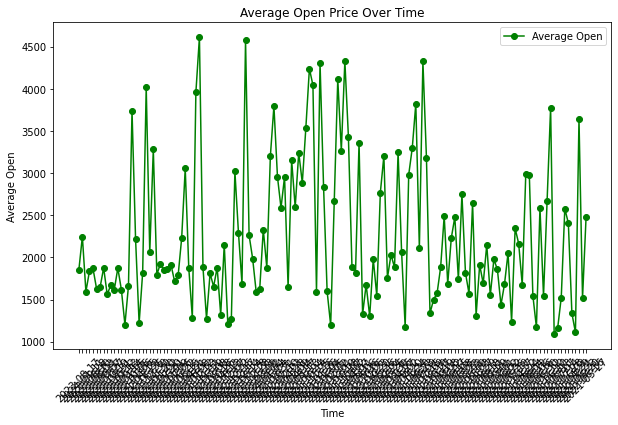

In [0]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import pandas as pd

# Assuming streamingAggregationsDF is your streaming DataFrame

# Collect streaming data into a Pandas DataFrame
streaming_data = streamingAggregationsDF.toPandas()

# Plot a bar chart for total_market_cap
plt.figure(figsize=(10, 6))
plt.bar(streaming_data['time'], streaming_data['total_market_cap'], color='blue')
plt.xlabel('Time')
plt.ylabel('Total Market Cap')
plt.title('Total Market Cap Over Time')
plt.xticks(rotation=45)
plt.show()

# Plot a time series for avg_open
plt.figure(figsize=(10, 6))
plt.plot(streaming_data['time'], streaming_data['avg_open'], marker='o', color='green', label='Average Open')
plt.xlabel('Time')
plt.ylabel('Average Open')
plt.title('Average Open Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [0]:
from pyspark.sql.functions import col, round

# Similar to definition of staticInputDF above, just using `readStream` instead of `read`
streamingInputDF = (
  spark
    .readStream                       
    .schema(jsonSchema)               # Set the schema of the JSON data
    .option("maxFilesPerTrigger", 1)  # Treat a sequence of files as a stream by picking one file at a time
    .json(inputPath)
)

streamingAggregationsDF = (
    streamingInputDF
        .groupBy(round(col("highUsd") / 1000, 0)).count()
)
streamingAggregationsDF.isStreaming

Out[17]: True

In [0]:
spark.conf.set("spark.sql.shuffle.partitions", "2")  # keep the size of shuffles small
checkpoint_location = "dbfs:/FileStore/shared_uploads/ijevtic420rn@raf/"
query = (
  streamingAggregationsDF
    .writeStream
    .format("memory")        # memory = store in-memory table 
    .queryName("counts")     # counts = name of the in-memory table
    .outputMode("complete")  # complete = all the counts should be in the table
    .option("checkpointLocation", checkpoint_location)
    .start()
)

query.awaitTermination()

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, TimestampType

# Define the case class
class CryptoData:
    def __init__(self, openUsd, highUsd, lowUsd, closeUsd, volume, marketCapUsd, date):
        self.openUsd = openUsd
        self.highUsd = highUsd
        self.lowUsd = lowUsd
        self.closeUsd = closeUsd
        self.volume = volume
        self.marketCapUsd = marketCapUsd
        self.date = date

# Define the schema
jsonSchema = StructType([
    StructField("openUsd", StringType(), True),
    StructField("highUsd", StringType(), True),
    StructField("lowUsd", StringType(), True),
    StructField("closeUsd", StringType(), True),
    StructField("volume", StringType(), True),
    StructField("marketCapUsd", StringType(), True),
    StructField("date", StringType(), True)
])

# Initialize Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Read the CSV data into a Dataset
streaming_data_df = (
    spark
    .readStream
    .option("header", "true")  # Skip the first row as header
    .schema(jsonSchema)
    .csv(inputPath)
    .withColumn("timestamp", to_timestamp("date", "yyyy-MM-dd"))  # Convert 'date' to timestamp
)

# def process_batch(df, epoch_id):
#     # Your custom processing logic here
#     df.show()

query = (
    streaming_data_df
    .writeStream
    .format("csv") 
    .option("path", "dbfs:/FileStore/shared_uploads/ijevtic420rn@raf.rs/cryptoETH.csv")
    .outputMode("append")
    .option("basePath", checkpoint_location)
    .option("checkpointLocation", checkpoint_location)
    .start()
)

query.awaitTermination()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-2730704563550407>:44
     39 # def process_batch(df, epoch_id):
     40 #     # Your custom processing logic here
     41 #     df.show()
     42 checkpoint_location = "dbfs:/FileStore/shared_uploads/ijevtic420rn@raf/"
     43 query = (
---> 44     streaming_data_df
     45     .writeStream
     46     .format("csv")  # Specify the format (can be "parquet", "json", etc.)
     47     .option("path", "dbfs:/FileStore/shared_uploads/ijevtic420rn@raf.rs/cryptoETH.csv")  # Specify the destination path
     48     .outputMode("append")  # Use "append" mode for writing the entire content
     49     .option("basePath", checkpoint_location)
     50     .option("checkpointLocation", checkpoint_location)
     51     .load(checkpoint_location)
     52     .start()
     53 )
     55 query.awaitTermination()

AttributeError: 'DataStrea

In [0]:
from pyspark.sql.functions import sum, avg, window

# Define a windowed aggregation (e.g., average close price over a 1-day window)
windowedDF = (
    staticInputDF
    .groupBy(window("date", "1 week"))
    .agg(avg("closeUsd").alias("avg_close_price"))
)

display(windowedDF)